# Fraud Dection in Online Transactions

This is the Kaggle project in IEEE Computational Intelligence Society (IEEE-CIS) Fraud Dection: 

Addison Howard, Bernadette Bouchon-Meunier, IEEE CIS, inversion, John Lei, Lynn@Vesta, Marcus2010, Prof. Hussein Abbass. (2019). IEEE-CIS Fraud Detection. Kaggle. https://kaggle.com/competitions/ieee-fraud-detection

# Methodology 
I will use following **Machine Learning Models** to conduct this project 
1. **Logistic Regression**: This is a basic model that can be used as a starting point. It's simple and interpretable.

2. **Decision Trees and Random Forests**: These models can capture complex patterns in the data. Random Forests, being an ensemble of decision trees, can provide a more robust solution against overfitting.

3. **Neural Networks**: Deep learning models, especially autoencoders, can be used for anomaly detection. An autoencoder tries to reconstruct its input data, and a high reconstruction error can indicate a fraudulent transaction.

4. **Support Vector Machines (SVM)**: SVMs can be effective, especially when the data is not linearly separable.

5. **K-Nearest Neighbors (KNN)**: This is an instance-based learning algorithm that can be used for its simplicity and effectiveness.

    K-means via RapidsML cuDF: https://www.kaggle.com/code/suraj520/k-means-via-rapidsml-cudf-know-fit-infer
    

The following **Techniques** will be involved:

1. **Principal Component Analysis (PCA)**: Given that credit card registers are considered personal information and cannot be shared publicly, PCA can be used to mask the actual variables, changing not only their names but also their numeric values. This allows for dimensionality reduction and working with real data without revealing any personal information.
2. **Handling Imbalanced Data**: Fraudulent transactions are typically much fewer than legitimate ones, leading to class imbalance. Techniques like oversampling, undersampling, and using the Synthetic Minority Over-sampling Technique (SMOTE) can help balance the classes.


The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features.


# References

[1] Data Science in Banking: Fraud Detection. https://www.datacamp.com/blog/data-science-in-banking

[2] Modelling Credit Card Frauds. https://towardsdatascience.com/modelling-credit-card-fraud-detection-e3006dd212ab

[3] 1st Place Solution. https://www.kaggle.com/c/ieee-fraud-detection/discussion/111284



In [13]:
!pip install scikit-learn==0.23.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 11.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [725 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_vers

           ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 27.3/42.0 MB 11.5 MB/s eta 0:00:02
           ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 27.8/42.0 MB 11.4 MB/s eta 0:00:02
           ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 28.3/42.0 MB 11.6 MB/s eta 0:00:02
           ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 28.3/42.0 MB 11.6 MB/s eta 0:00:02
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 28.9/42.0 MB 11.6 MB/s eta 0:00:02
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 29.6/42.0 MB 11.2 MB/s eta 0:00:02
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 30.2/42.0 MB 11.0 MB/s eta 0:00:02
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 30.9/42.0 MB 11.0 MB/s eta 0:00:02
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 31.5/42.0 MB 11.0 MB/s eta 0:00:01
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 32.2/42.0 MB 11.1 MB/s eta 0:00:01
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 32.8/42.0 MB 11.3 MB/s eta 0:00:01
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import scipy as sp
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 
from sklearn.cluster import KMeans 
import seaborn as sns


In [4]:
Test_ID = pd.read_csv('./RawData/test_identity.csv')
Test_Trans = pd.read_csv('./RawData/test_transaction.csv')
Train_ID = pd.read_csv('./RawData/train_identity.csv')
Train_Trans = pd.read_csv('./RawData/train_transaction.csv')
Train_Trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


**Transaction Table**

* TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
* TransactionAMT: transaction payment amount in USD
* ProductCD: product code, the product for each transaction
* card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
* addr: address
* dist: distance
* P_ and (R__) emaildomain: purchaser and recipient email domain
* C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
* D1-D15: timedelta, such as days between previous transaction, etc.
* M1-M9: match, such as names on card and address, etc.
* Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

**Categorical Features:**

* ProductCD
* card1 - card6
* addr1, addr2 
* P_emaildomain
* R_emaildomain
* M1 - M9


**Identity Table**

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. 

They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

**Categorical Features:**
* DeviceType
* DeviceInfo
* id_12 - id_38

In [5]:
Train_df = Train_Trans.merge(Train_ID, on = 'TransactionID', how='left')
Test_df = Test_Trans.merge(Test_ID, on = 'TransactionID', how='left')
Test_df.head()


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(Train_df.columns)
print('the size of train set is : ', Train_df.shape)
print(Test_df.columns)
print('the size of test set is : ', Test_df.shape)


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)
the size of train set is :  (590540, 434)
Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=433)
the size of test set is :  (506691, 433)


In [7]:
#Check if there is any feature columns available in train but not in test
different_features = [features for features in Train_df.columns if features not in Test_df.columns]
print(different_features)

['isFraud', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']


### it was found that, the naming in train set and test set are different, by using '_' or '-'

In [8]:
Test_df = Test_df.rename(columns={"id-01": "id_01", "id-02": "id_02", "id-03": "id_03", 
                            "id-06": "id_06", "id-05": "id_05", "id-04": "id_04", 
                            "id-07": "id_07", "id-08": "id_08", "id-09": "id_09", 
                            "id-10": "id_10", "id-11": "id_11", "id-12": "id_12", 
                            "id-15": "id_15", "id-14": "id_14", "id-13": "id_13", 
                            "id-16": "id_16", "id-17": "id_17", "id-18": "id_18", 
                            "id-21": "id_21", "id-20": "id_20", "id-19": "id_19", 
                            "id-22": "id_22", "id-23": "id_23", "id-24": "id_24", 
                            "id-27": "id_27", "id-26": "id_26", "id-25": "id_25", 
                            "id-28": "id_28", "id-29": "id_29", "id-30": "id_30", 
                            "id-31": "id_31", "id-32": "id_32", "id-33": "id_33", 
                            "id-34": "id_34", "id-35": "id_35", "id-36": "id_36", 
                            "id-37": "id_37", "id-38": "id_38"})
Test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
features_with_na=[features for features in Train_df.columns if Train_df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
most_frequent_missing = []
for feature in features_with_na:
    print(feature, np.round(Train_df[feature].isnull().mean(), 4),  ' % missing values')
gc.collect()

card2 0.0151  % missing values
card3 0.0027  % missing values
card4 0.0027  % missing values
card5 0.0072  % missing values
card6 0.0027  % missing values
addr1 0.1113  % missing values
addr2 0.1113  % missing values
dist1 0.5965  % missing values
dist2 0.9363  % missing values
P_emaildomain 0.1599  % missing values
R_emaildomain 0.7675  % missing values
D1 0.0021  % missing values
D2 0.4755  % missing values
D3 0.4451  % missing values
D4 0.286  % missing values
D5 0.5247  % missing values
D6 0.8761  % missing values
D7 0.9341  % missing values
D8 0.8731  % missing values
D9 0.8731  % missing values
D10 0.1287  % missing values
D11 0.4729  % missing values
D12 0.8904  % missing values
D13 0.8951  % missing values
D14 0.8947  % missing values
D15 0.1509  % missing values
M1 0.4591  % missing values
M2 0.4591  % missing values
M3 0.4591  % missing values
M4 0.4766  % missing values
M5 0.5935  % missing values
M6 0.2868  % missing values
M7 0.5864  % missing values
M8 0.5863  % missing v

id_22 0.9912  % missing values
id_23 0.9912  % missing values
id_24 0.992  % missing values
id_25 0.9913  % missing values
id_26 0.9913  % missing values
id_27 0.9912  % missing values
id_28 0.7613  % missing values
id_29 0.7613  % missing values
id_30 0.8687  % missing values
id_31 0.7625  % missing values
id_32 0.8686  % missing values
id_33 0.8759  % missing values
id_34 0.8682  % missing values
id_35 0.7613  % missing values
id_36 0.7613  % missing values
id_37 0.7613  % missing values
id_38 0.7613  % missing values
DeviceType 0.7616  % missing values
DeviceInfo 0.7991  % missing values


0

the Fraud sample percentage is:  0.03499000914417313
The number of Fraud sample  is:  0    569877
1     20663
Name: isFraud, dtype: int64


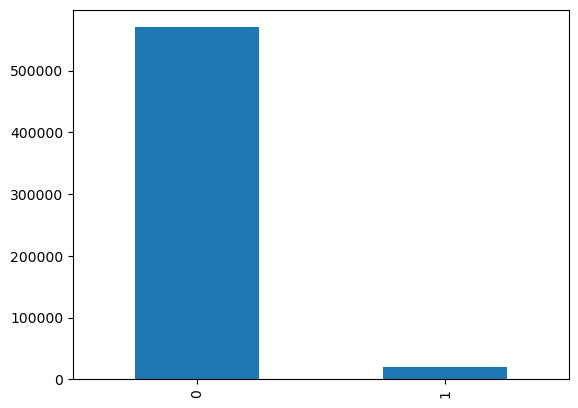

In [10]:
Train_df['isFraud'].value_counts().plot.bar()
print("the Fraud sample percentage is: ", sum(Train_df['isFraud'])/len(Train_df['isFraud']))
print("The number of Fraud sample  is: ", Train_df['isFraud'].value_counts())

# Understand these features

## 1. Transation features
    
    'TransactionID' = 'TransactionDT'
    
## 2. Card features
## 3. C features
## 4. D features
## 5. V1-V1332 features
    Because there were a lot features. These v-features were devided into 13 groups.  
    Group 1 - V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 shows 0.4729 % missing value
    Group 2 - V12 - V34 features 
    Group 2 V12-V34 0.1288 % missing values
    Group 3 - V35 - V52 features
    Group 3 V35 - V52 0.2861 % missing values
    Group 4 
## 6. ID features



In [11]:
Transaction_features = [features for features in Train_df.columns if 'Transaction' in features] 
print(Transaction_features)

['TransactionID', 'TransactionDT', 'TransactionAmt']


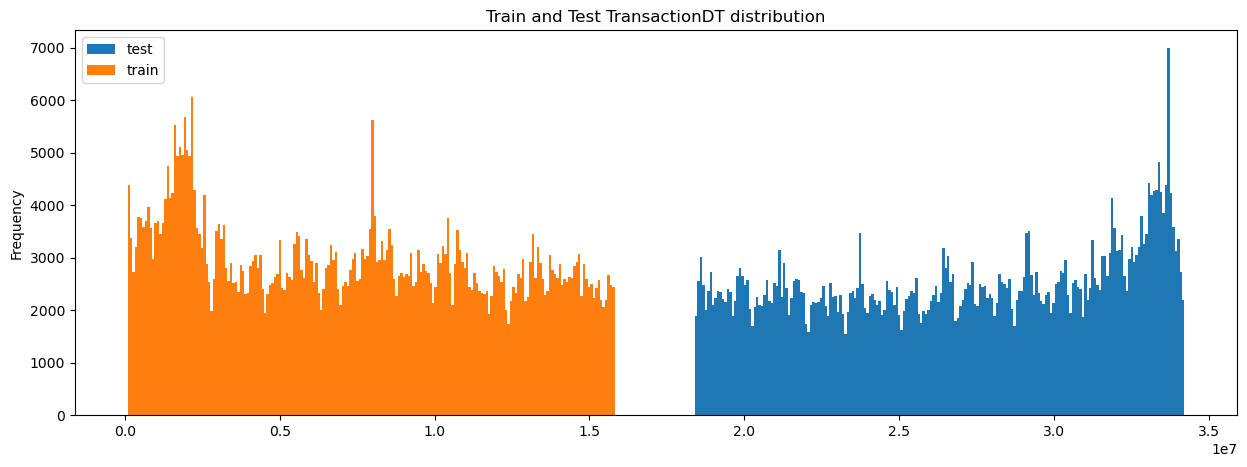

In [12]:
Test_df['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='test', bins=200, title='Train and Test TransactionDT distribution')
Train_df['TransactionDT'].plot(kind='hist', label='train', bins=200)
plt.legend()
plt.show()

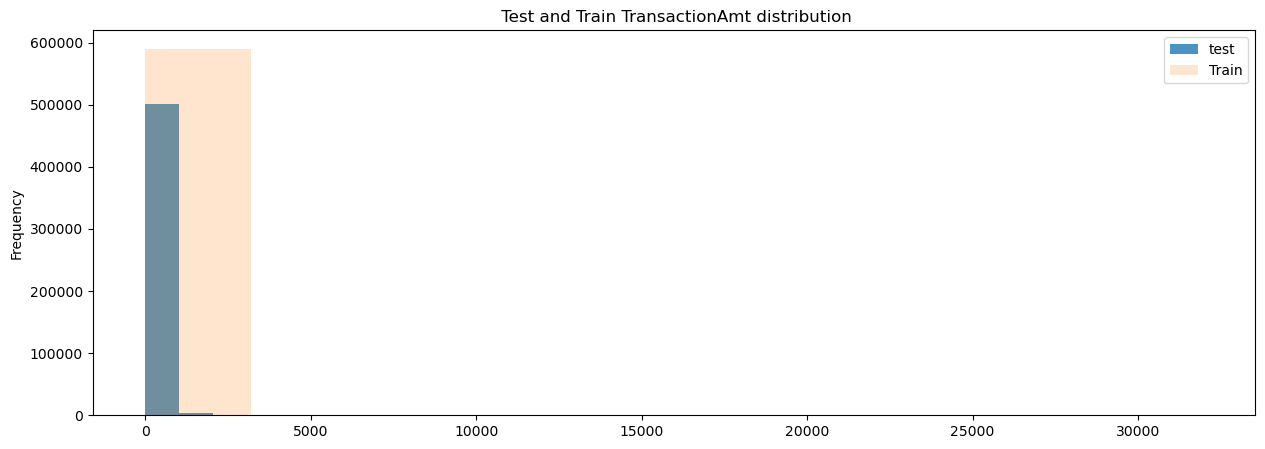

In [13]:
Test_df['TransactionAmt'].plot(kind='hist', figsize=(15, 5), label='test', bins=10, alpha = 0.8, title=' Test and Train TransactionAmt distribution')
Train_df['TransactionAmt'].plot(kind='hist', label='Train', bins=10, alpha = 0.2)
plt.legend()
plt.show()

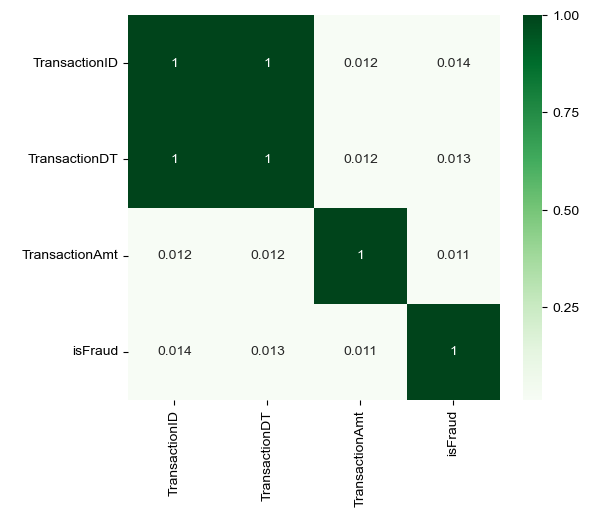

In [14]:
correlation_Transaction_features = ['TransactionID','TransactionDT', 'TransactionAmt','isFraud']
ccorrelation_Transaction = Train_df[correlation_Transaction_features].corr()
plt.subplots(figsize = (6, 5))
sns.heatmap(ccorrelation_Transaction,annot=True, cmap = 'Greens')
sns.set(font_scale=3)

total number of categories in this card1 13553 
total number of categories in this card2 500 
total number of categories in this card3 114 
total number of categories in this card4 4 
total number of categories in this card5 119 
total number of categories in this card6 4 


/var/folders/2t/t1qz9jt16lvfs2q8jprjbp3w0000gn/T/ipykernel_12919/2482346021.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_card = Train_df[card_features].corr()


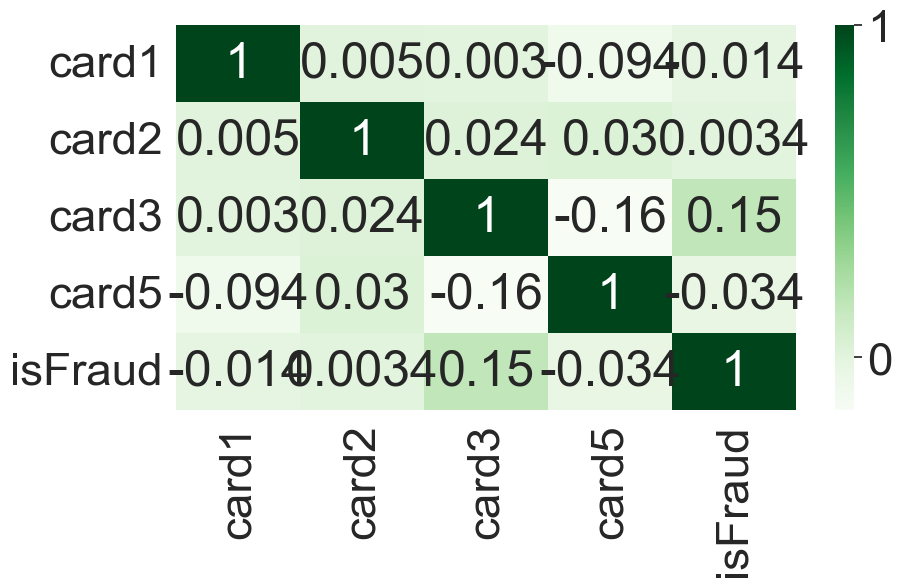

In [15]:
card_features = [features for features in Train_df.columns if 'card' in features] 
for features in card_features:
    print("total number of categories in this {} {} ".format(features,len(Train_df[features].value_counts())))
card_features += ['isFraud']
correlation_card = Train_df[card_features].corr()
plt.subplots(figsize = (10, 5))
sns.heatmap(correlation_card,annot=True, cmap = 'Greens') 
sns.set(font_scale=5)

total number of categories in  C1 1657 
total number of categories in  C2 1216 
total number of categories in  C3 27 
total number of categories in  C4 1260 
total number of categories in  C5 319 
total number of categories in  C6 1328 
total number of categories in  C7 1103 
total number of categories in  C8 1253 
total number of categories in  C9 205 
total number of categories in  C10 1231 
total number of categories in  C11 1476 
total number of categories in  C12 1199 
total number of categories in  C13 1597 
total number of categories in  C14 1108 


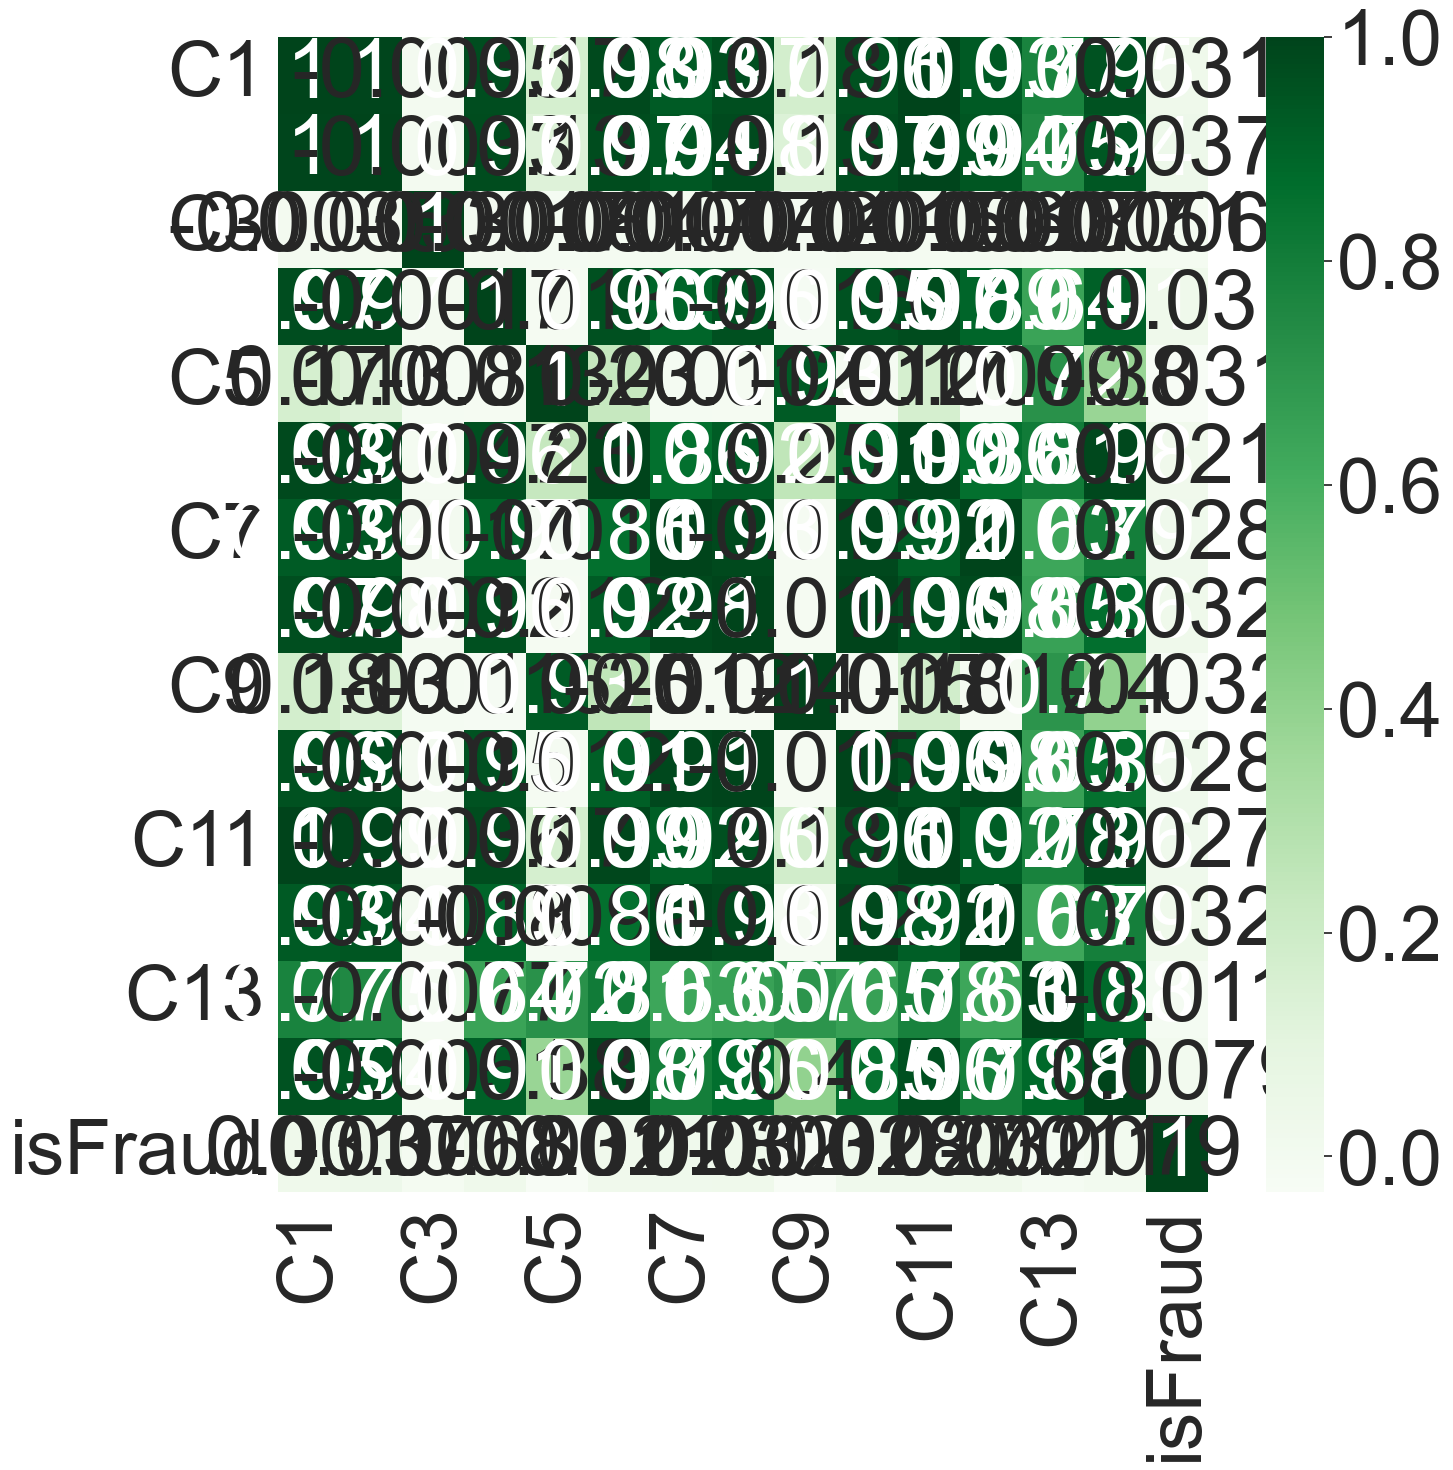

In [16]:
c_features = [features for features in Train_df.columns if 'C' in features] 
c_features.remove('ProductCD')
for features in  c_features:
    print("total number of categories in  {} {} ".format(features,len(Train_df[features].value_counts())))
c_features += ['isFraud']
correlation_c = Train_df[c_features].corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation_c,annot=True, cmap = 'Greens') 
sns.set(font_scale=5)


In [22]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
new_c = correlation(correlation_c, 0.9)
print( "Threse features are highly correlated" + str(new_c))

Threse features are highly correlated{'C6', 'C8', 'C10', 'C7', 'C2', 'C9', 'C12', 'C4', 'C11', 'C14'}


['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']
total number of categories in  D1 641 
total number of categories in  D2 641 
total number of categories in  D3 649 
total number of categories in  D4 808 
total number of categories in  D5 688 
total number of categories in  D6 829 
total number of categories in  D7 597 
total number of categories in  D8 12353 
total number of categories in  D9 24 
total number of categories in  D10 818 
total number of categories in  D11 676 
total number of categories in  D12 635 
total number of categories in  D13 577 
total number of categories in  D14 802 
total number of categories in  D15 859 


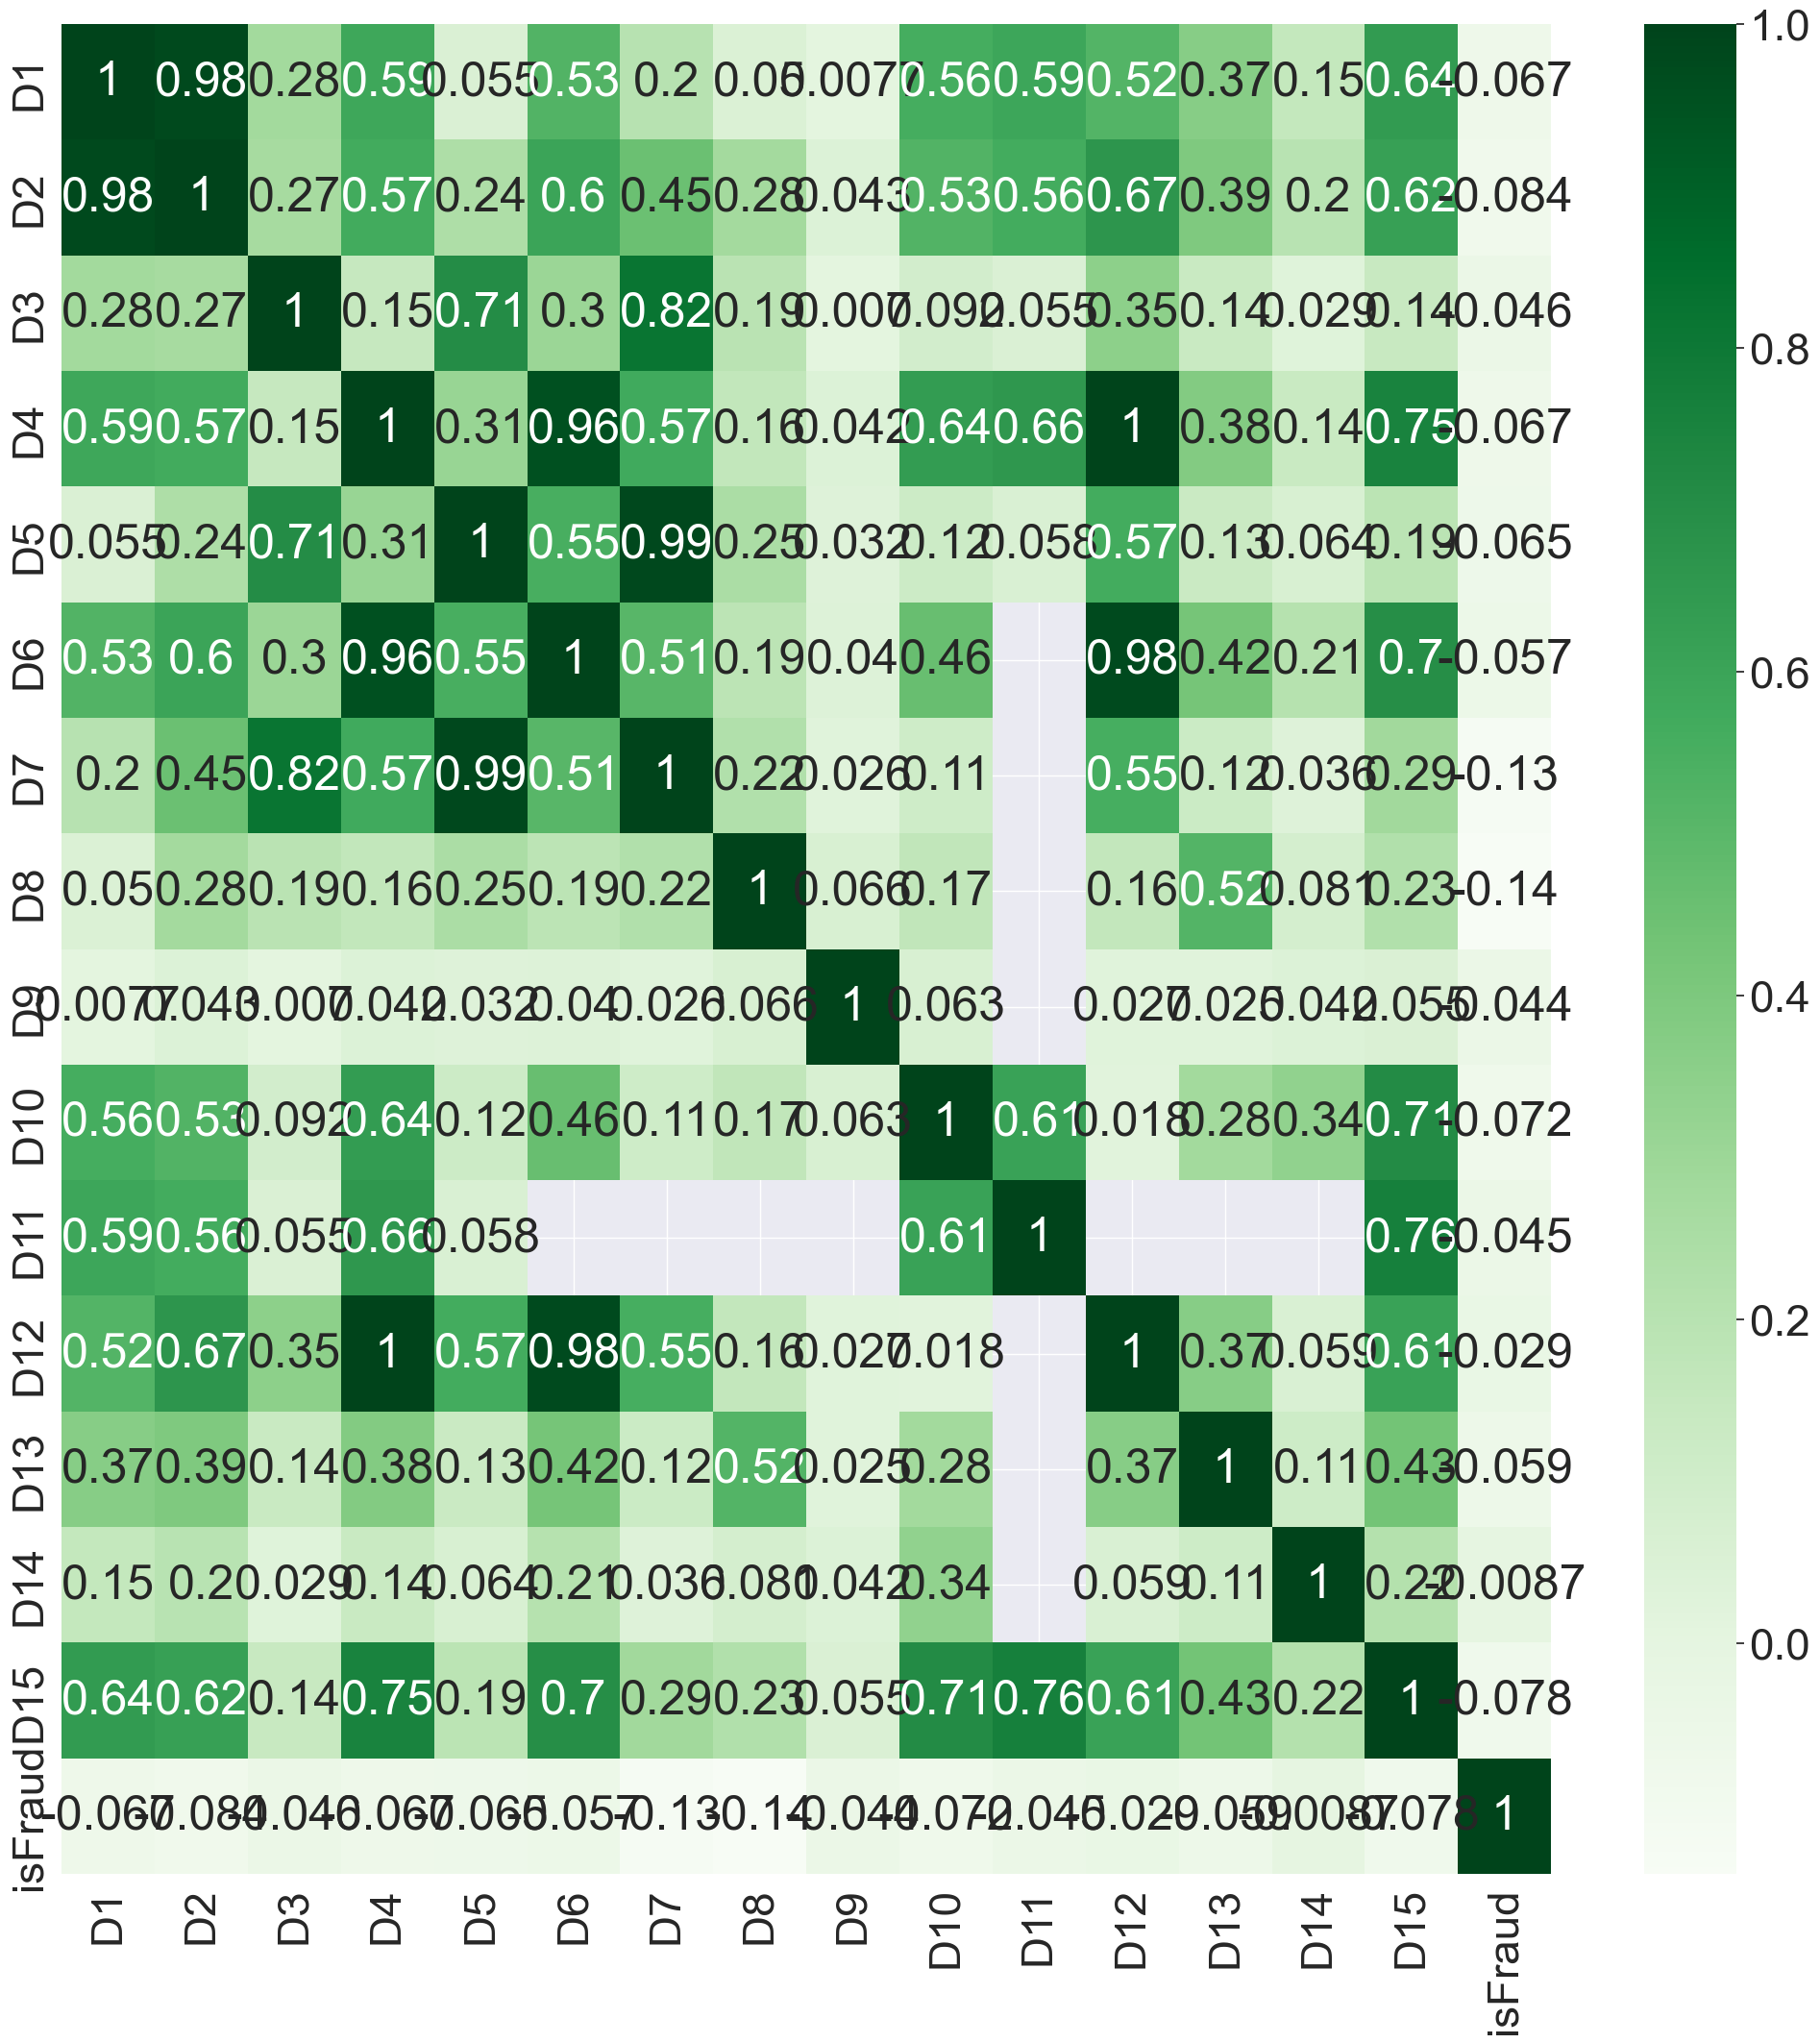

In [23]:
d_features = [features for features in Train_df.columns if 'D' in features] 
d_features.remove('ProductCD')
d_features.remove('TransactionID')
d_features.remove('TransactionDT')
d_features.remove('DeviceType')
d_features.remove('DeviceInfo')
print(d_features)
for features in  d_features:
    print("total number of categories in  {} {} ".format(features,len(Train_df[features].value_counts())))
d_features += ['isFraud']
correlation_d = Train_df[d_features].corr()
plt.subplots(figsize = (25,25))
sns.heatmap(correlation_d,annot=True, cmap = 'Greens') 
sns.set(font_scale=2)

In [24]:
new_d = correlation(correlation_d, 0.9)
print( "Threse features are highly correlated" + str(new_d))

Threse features are highly correlated{'D15', 'D7', 'D13', 'D2', 'D12', 'D6'}


In [25]:
V_features = [features for features in Train_df.columns if 'V' in features] 
print(V_features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V1

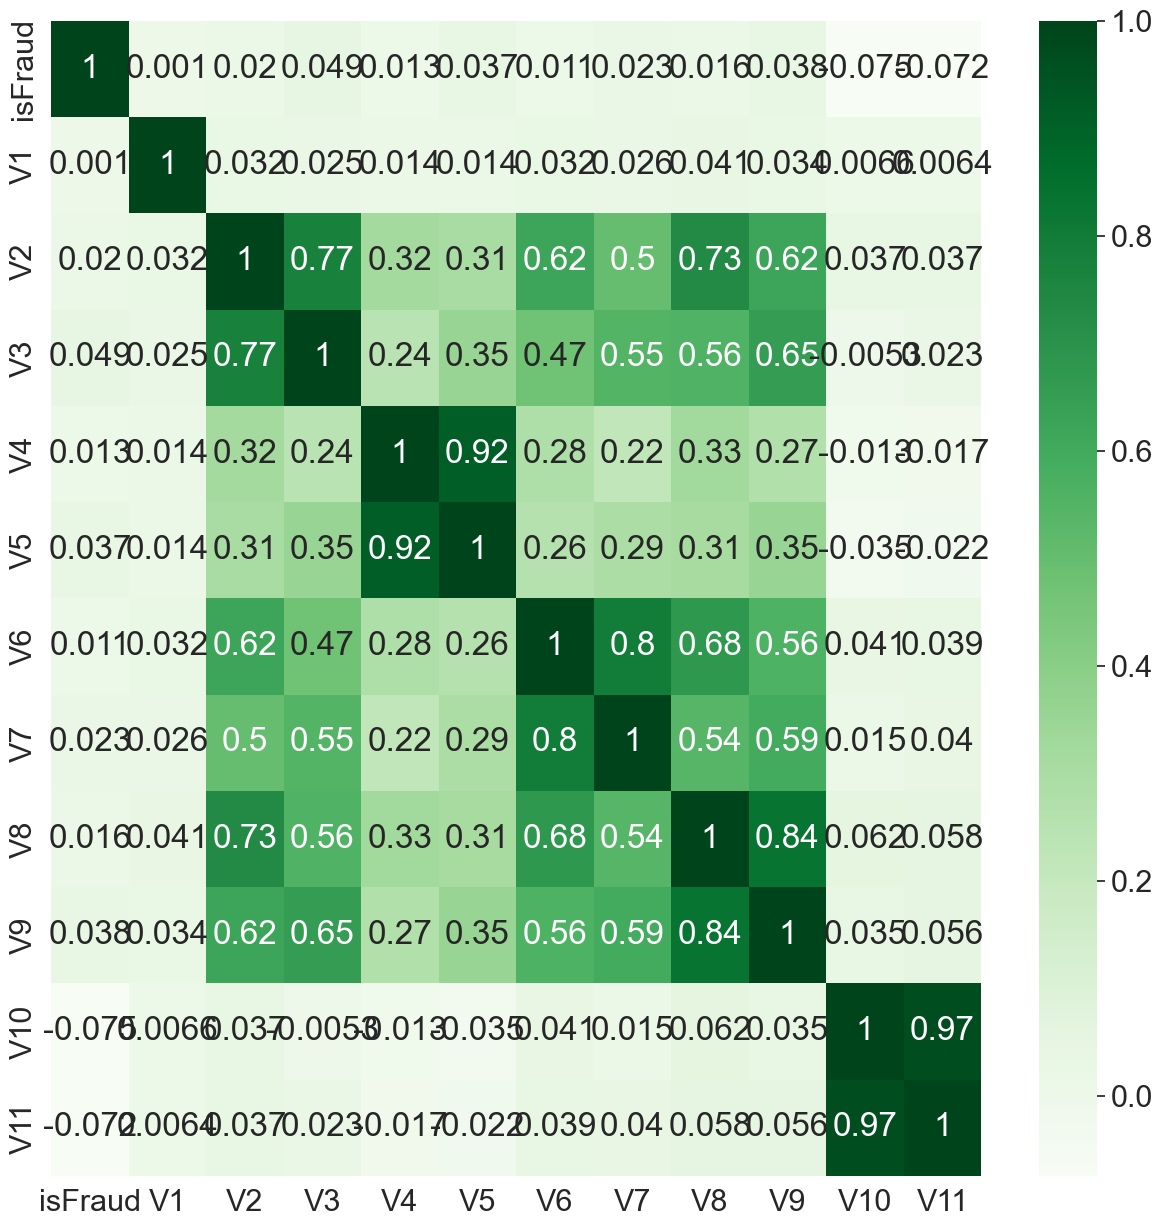

In [26]:
V1G_features =['isFraud','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']
correlation_V1G = Train_df[V1G_features].corr()
plt.subplots(figsize = (15, 15))
sns.heatmap(correlation_V1G ,annot=True, cmap = 'Greens') 
sns.set(font_scale=3)

In [27]:
new_V1 = correlation(correlation_V1G, 0.9)
print ('There are ', len(new_V1), 'correlated features')
print( "These features are highly correlated" + str(new_V1))

There are  6 correlated features
These features are highly correlated{'V8', 'V11', 'V9', 'V5', 'V7', 'V3'}


In [28]:
V2G_features =['isFraud','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34']
correlation_V2G = Train_df[V2G_features].corr()
new_V2 = correlation(correlation_V2G, 0.9)
print ('There are ', len(new_V2), 'correlated features')
print( "These features are highly correlated" + str(new_V2))

There are  15 correlated features
These features are highly correlated{'V26', 'V18', 'V22', 'V17', 'V16', 'V13', 'V28', 'V31', 'V20', 'V30', 'V32', 'V33', 'V34', 'V21', 'V24'}


In [29]:
V3G_features = ['isFraud','V35','V36','V37','V38','V39','V40','V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52']
correlation_V3G = Train_df[V3G_features].corr()
new_V3 = correlation(correlation_V3G, 0.9)
print ('There are ', len(new_V3), 'correlated features')
print( "These features are highly correlated" + str(new_V3))

There are  11 correlated features
These features are highly correlated{'V52', 'V40', 'V42', 'V51', 'V38', 'V36', 'V45', 'V50', 'V43', 'V47', 'V49'}


In [30]:
V4G_features = ['isFraud','V53','V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74']
correlation_V4G = Train_df[V4G_features].corr()
new_V4 = correlation(correlation_V4G, 0.8)
print ('There are ', len(new_V4), 'correlated features')
print( "These features are highly correlated" + str(new_V4))

There are  15 correlated features
These features are highly correlated{'V72', 'V64', 'V54', 'V56', 'V60', 'V71', 'V74', 'V59', 'V57', 'V70', 'V63', 'V67', 'V62', 'V73', 'V58'}


In [31]:
V5G_features = ['isFraud','V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94']               
correlation_V5G = Train_df[V5G_features].corr()
new_V5 = correlation(correlation_V5G, 0.8)
print ('There are ', len(new_V5), 'correlated features')
print( "These features are highly correlated" + str(new_V5))

There are  14 correlated features
These features are highly correlated{'V83', 'V79', 'V85', 'V92', 'V87', 'V84', 'V78', 'V94', 'V81', 'V80', 'V86', 'V93', 'V76', 'V91'}


In [32]:
V6G_features = ['isFraud','V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']                
correlation_V6G = Train_df[V6G_features].corr()
new_V6 = correlation(correlation_V6G, 0.8)
print ('There are ', len(new_V6), 'correlated features')
print( "These features are highly correlated" + str(new_V6))

There are  34 correlated features
These features are highly correlated{'V111', 'V120', 'V105', 'V123', 'V96', 'V132', 'V133', 'V125', 'V106', 'V119', 'V126', 'V130', 'V131', 'V100', 'V110', 'V97', 'V112', 'V101', 'V136', 'V113', 'V109', 'V134', 'V137', 'V117', 'V115', 'V114', 'V118', 'V127', 'V104', 'V103', 'V102', 'V116', 'V128', 'V122'}


In [33]:
V7G_features = ['isFraud','V138', 'V139', 'V140', 'V141', 'V142', 'V146', 'V147', 'V148', 'V149', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V161', 'V162', 'V163']
correlation_V7G = Train_df[V7G_features].corr()
new_V7 = correlation(correlation_V7G, 0.8)
print ('There are ', len(new_V7), 'correlated features')
print( "These features are highly correlated" + str(new_V7))



There are  13 correlated features
These features are highly correlated{'V156', 'V162', 'V142', 'V163', 'V157', 'V149', 'V155', 'V158', 'V161', 'V154', 'V147', 'V153', 'V140'}


In [34]:
V8G_features = ['isFraud','V143', 'V144', 'V145', 'V150', 'V151', 'V152', 'V159', 'V160', 'V164', 'V165', 'V166']
correlation_V8G = Train_df[V8G_features].corr()
new_V8 = correlation(correlation_V8G, 0.8)
print ('There are ', len(new_V8), 'correlated features')
print( "These features are highly correlated" + str(new_V8))

There are  9 correlated features
These features are highly correlated{'V165', 'V151', 'V145', 'V150', 'V160', 'V164', 'V159', 'V152', 'V166'}


In [35]:
V9G_features = ['isFraud','V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216']
correlation_V9G = Train_df[V9G_features].corr()
new_V9 = correlation(correlation_V9G, 0.8)
print ('There are ', len(new_V9), 'correlated features')
print( "These features are highly correlated" + str(new_V9))

There are  25 correlated features
These features are highly correlated{'V168', 'V179', 'V193', 'V203', 'V204', 'V186', 'V192', 'V212', 'V177', 'V213', 'V187', 'V176', 'V202', 'V205', 'V211', 'V216', 'V183', 'V199', 'V181', 'V190', 'V178', 'V191', 'V196', 'V207', 'V182'}


In [36]:
V10G_features = ['isFraud','V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278']
correlation_V10G = Train_df[V10G_features].corr()
new_V10 = correlation(correlation_V10G, 0.8)
print ('There are ', len(new_V10), 'correlated features')
print( "These features are highly correlated" + str(new_V10))


There are  37 correlated features
These features are highly correlated{'V263', 'V257', 'V253', 'V224', 'V235', 'V230', 'V278', 'V262', 'V243', 'V247', 'V277', 'V225', 'V258', 'V275', 'V244', 'V274', 'V249', 'V254', 'V246', 'V233', 'V231', 'V248', 'V236', 'V261', 'V265', 'V267', 'V268', 'V269', 'V232', 'V242', 'V219', 'V241', 'V273', 'V237', 'V218', 'V252', 'V229'}


In [37]:
V10G_features = ['isFraud','V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278']
correlation_V10G = Train_df[V10G_features].corr()
new_V10 = correlation(correlation_V10G, 0.8)
print ('There are ', len(new_V10), 'correlated features')
print( "These features are highly correlated" + str(new_V10))


There are  37 correlated features
These features are highly correlated{'V263', 'V257', 'V253', 'V224', 'V235', 'V230', 'V278', 'V262', 'V243', 'V247', 'V277', 'V225', 'V258', 'V275', 'V244', 'V274', 'V249', 'V254', 'V246', 'V233', 'V231', 'V248', 'V236', 'V261', 'V265', 'V267', 'V268', 'V269', 'V232', 'V242', 'V219', 'V241', 'V273', 'V237', 'V218', 'V252', 'V229'}


In [38]:
V11G_features = ['isFraud','V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272']
correlation_V11G = Train_df[V11G_features].corr()
new_V11 = correlation(correlation_V11G, 0.8)
print ('There are ', len(new_V11), 'correlated features')
print( "These features are highly correlated" + str(new_V11))


There are  10 correlated features
These features are highly correlated{'V272', 'V222', 'V251', 'V239', 'V255', 'V259', 'V245', 'V256', 'V227', 'V271'}


In [39]:
V12G_features = ['isFraud','V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']
correlation_V12G = Train_df[V12G_features].corr()
new_V12 = correlation(correlation_V12G, 0.8)
print ('There are ', len(new_V12), 'correlated features')
print( "These features are highly correlated" + str(new_V12))


There are  23 correlated features
These features are highly correlated{'V298', 'V297', 'V291', 'V307', 'V293', 'V318', 'V292', 'V311', 'V287', 'V321', 'V303', 'V294', 'V304', 'V299', 'V317', 'V308', 'V295', 'V310', 'V316', 'V312', 'V320', 'V306', 'V280'}


In [40]:
V13G_features = ['isFraud','V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']
correlation_V13G = Train_df[V13G_features].corr()
new_V13 = correlation(correlation_V13G, 0.8)
print ('There are ', len(new_V13), 'correlated features')
print( "These features are highly correlated" + str(new_V13))


There are  13 correlated features
These features are highly correlated{'V332', 'V324', 'V329', 'V336', 'V327', 'V323', 'V326', 'V331', 'V338', 'V339', 'V330', 'V328', 'V333'}


In [42]:
type(V_features)

list

In [43]:
id_features =[features for features in Train_df.columns if 'id_' in features]
id_features += ['isFraud']
correlation_id = Train_df[id_features].corr()
new_id = correlation(correlation_id, 0.9)
print ('There are ', len(new_id), 'correlated features')
print( "These features are highly correlated" + str(new_id))


/var/folders/2t/t1qz9jt16lvfs2q8jprjbp3w0000gn/T/ipykernel_12919/67502732.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_id = Train_df[id_features].corr()


There are  1 correlated features
These features are highly correlated{'id_09'}


In [49]:
Device_features =[features for features in Train_df.columns if 'Device' in features]
Device_features

['DeviceType', 'DeviceInfo']

In [51]:
email_features =[features for features in Train_df.columns if 'emaildomain' in features]
for f in email_features:
    print(feature)
    print(Train_df[f].value_counts())

DeviceInfo
gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com      

In [52]:
new_features = ['TransactionAmt', 'ProductCD',
                'card1', 'card2', 'card3', 'card5','card6', 'addr1', 'addr2', 
                'dist1', 'dist2', 'P_emaildomain''R_emaildomain', 
                'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10', 'C11', 'C12', 'C13', 'C14', 
                'D1', 'D2', 'D3', 'D4', 'D5','D10', 'D11', 'D15', 
                'M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8','M9', 
                'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17','V20', 'V23', 'V26',
                'V27', 'V30', 'V36', 'V37', 'V40', 'V41','V44', 'V47', 'V48', 'V54', 'V56', 
                'V59', 'V62', 'V65', 'V67','V68', 'V70', 'V76', 'V78', 'V80', 'V82', 'V86', 
                'V88', 'V89','V91', 'V107', 'V108', 'V111', 'V115', 'V117', 'V120', 'V121',
                'V123', 'V124', 'V127', 'V129', 'V130', 'V136', 'V138', 'V139','V142', 'V147', 
                'V156', 'V160', 'V162', 'V165', 'V166', 'V169','V171', 'V173', 'V175', 'V176', 
                'V178', 'V180', 'V182', 'V185','V187', 'V188', 'V198', 'V203', 'V205', 'V207', 
                'V209', 'V210','V215', 'V218', 'V220', 'V221', 'V223', 'V224', 'V226', 'V228',
                'V229', 'V234', 'V235', 'V238', 'V240', 'V250', 'V252', 'V253','V257', 'V258', 
                'V260', 'V261', 'V264', 'V266', 'V267', 'V271','V274', 'V277', 'V281', 'V283', 
                'V284', 'V285', 'V286', 'V289','V291', 'V294', 'V296', 'V297', 'V301', 'V303', 
                'V305', 'V307','V309', 'V310', 'V314', 'V320', 
                'id_01', 'id_02', 'id_03', 'id_04','id_05', 'id_06', 'id_09', 'id_10', 
                'id_11', 'id_12', 'id_13','id_15', 'id_16', 'id_17', 'id_18', 'id_19', 
                'id_20', 'id_28','id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 
                'DeviceType','DeviceInfo']
